In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_CSV = "../data/raw/raw_cleaned/final_test.csv"

In [3]:
#Load Dataset

df = pd.read_csv(PATH_TO_CSV)
df.columns = df.columns.str.strip()  # clean column names

In [4]:
#Select Numeric Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numeric columns selected for outlier check: {numeric_cols}")

Numeric columns selected for outlier check: ['movie id', 'rate', 'age', 'gender', 'occupation', 'Other', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year']


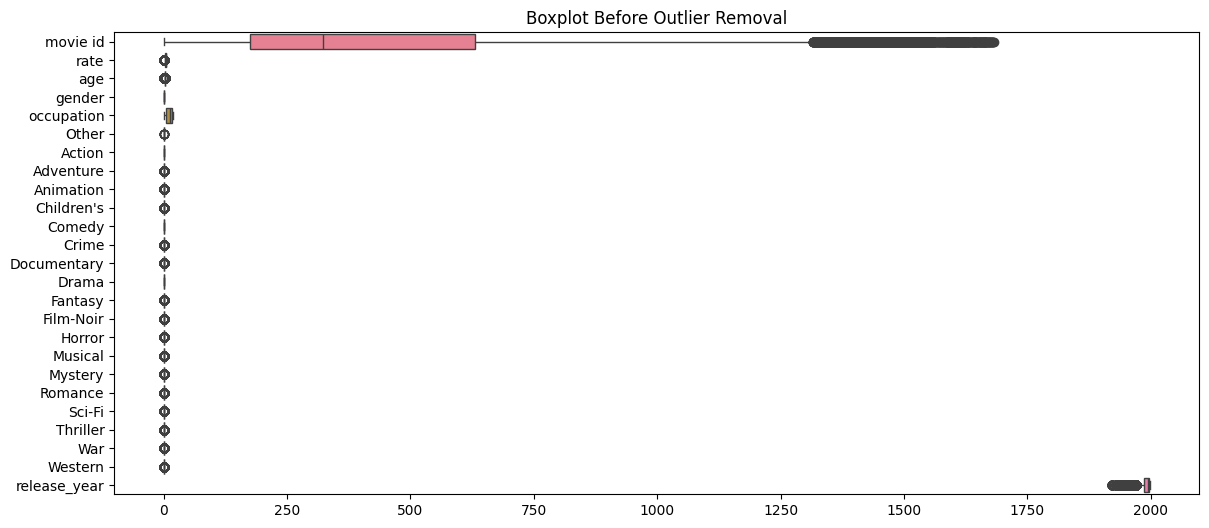

In [5]:
#EDA Visualization (Before Removal)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot Before Outlier Removal")
plt.show()


In [8]:
#Detect Outliers (IQR Method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Initialize dictionary to store outlier counts
outlier_counts = {}

for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)
    print(f"Outliers in {col}: {len(outliers)} rows")


Outliers in movie id: 1349 rows
Outliers in rate: 6110 rows
Outliers in Other: 10 rows
Outliers in Action: 0 rows
Outliers in Adventure: 13753 rows
Outliers in Animation: 3605 rows
Outliers in Children's: 7182 rows
Outliers in Comedy: 0 rows
Outliers in Crime: 8055 rows
Outliers in Documentary: 758 rows
Outliers in Drama: 0 rows
Outliers in Fantasy: 1352 rows
Outliers in Film-Noir: 1733 rows
Outliers in Horror: 5317 rows
Outliers in Musical: 4954 rows
Outliers in Mystery: 5245 rows
Outliers in Romance: 19461 rows
Outliers in Sci-Fi: 12730 rows
Outliers in Thriller: 21872 rows
Outliers in War: 9398 rows
Outliers in Western: 1854 rows
Outliers in release_year: 11578 rows


In [14]:
# Make a copy of the dataframe
df_cleaned = df.copy()
outlier_counts = {}

# Loop through numeric columns
for col in numeric_cols:
    # detect_outliers_iqr must return row indices, not values
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned.index[(df_cleaned[col] < Q1 - 1.5 * IQR) | (df_cleaned[col] > Q3 + 1.5 * IQR)]
    
    outlier_counts[col] = len(outliers)
    print(f"Outliers in {col}: {len(outliers)} rows")
    
    # Drop rows by index
    df_cleaned = df_cleaned.drop(outliers, axis=0)

print(f"After outlier removal: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)}")



Outliers in movie id: 1349 rows
Outliers in rate: 5803 rows
Outliers in Other: 8 rows
Outliers in Action: 0 rows
Outliers in Adventure: 12860 rows
Outliers in Animation: 3093 rows
Outliers in Children's: 2245 rows
Outliers in Comedy: 0 rows
Outliers in Crime: 6831 rows
Outliers in Documentary: 679 rows
Outliers in Drama: 0 rows
Outliers in Fantasy: 229 rows
Outliers in Film-Noir: 992 rows
Outliers in Horror: 4243 rows
Outliers in Musical: 2190 rows
Outliers in Mystery: 3209 rows
Outliers in Romance: 13780 rows
Outliers in Sci-Fi: 5028 rows
Outliers in Thriller: 7970 rows
Outliers in War: 3546 rows
Outliers in Western: 1381 rows
Outliers in release_year: 3112 rows
After outlier removal: 21452
Rows removed: 78548


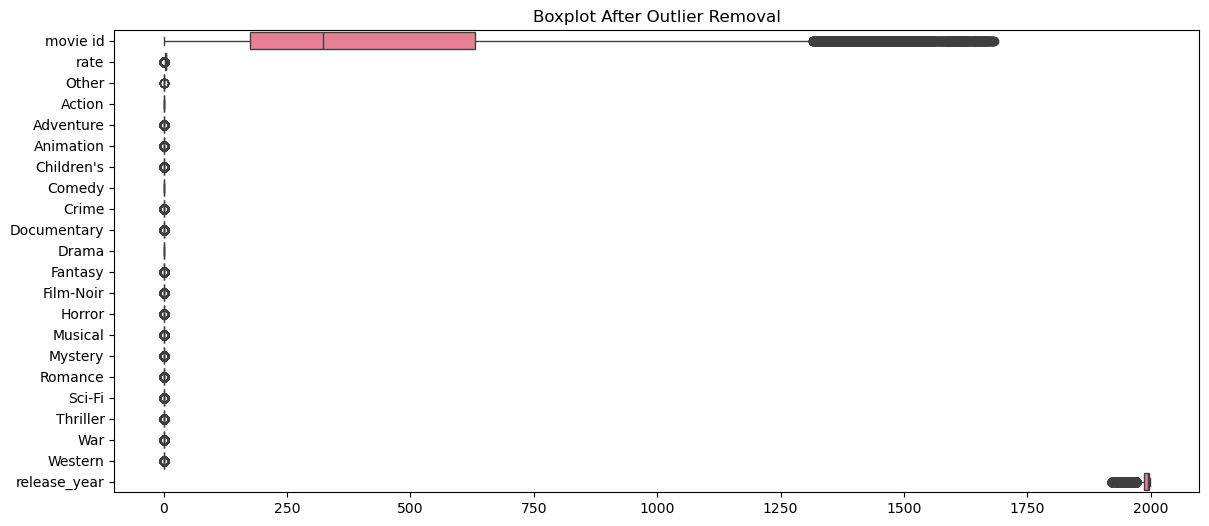

In [11]:
#EDA Visualization (After Removal)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_cleaned[numeric_cols], orient="h")
plt.title("Boxplot After Outlier Removal")
plt.show()

In [13]:
# --- STEP 7: Save Cleaned Dataset ---
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'
